**Importing the libraries we need for plotting, organizing, etc.**



In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Importing the dataset.**



In [168]:
churndf = pd.read_csv('Churn_Modelling.csv')

**Dropping unnecessary columns.**



In [169]:
#Drop unnecessary columns
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
churndf.drop(columns_to_drop, axis=1, inplace = True)

**Assessing which columns we have to work with.**


In [170]:
#Missing value columns
churndf.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Creating a heat\-map to assess the correlation between our variables.**


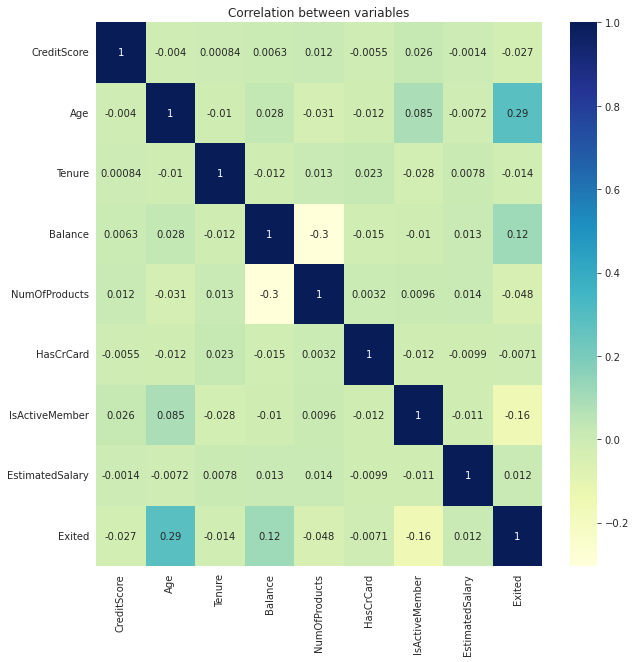

In [179]:
corr = churndf.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='YlGnBu', annot = True).set(title = 'Correlation between variables');

**Assessing the proportions of our target value triggers to our** **defaults.**



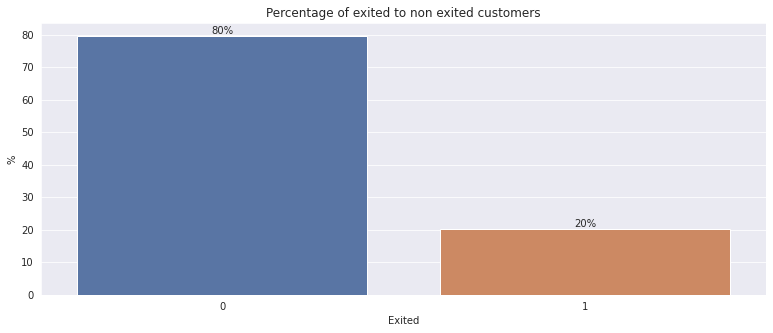

In [171]:
ax = sns.barplot(x='Exited', y='Exited', estimator=lambda x: len(x) / len(churndf) * 100, data=churndf)
ax.bar_label(ax.containers[0], fmt='%.f%%')
ax.set_ylabel('%')
ax.set_title('Percentage of exited to non-exited customers');

**Creating box\-plots to examine the spread of our data among multiple variables.**


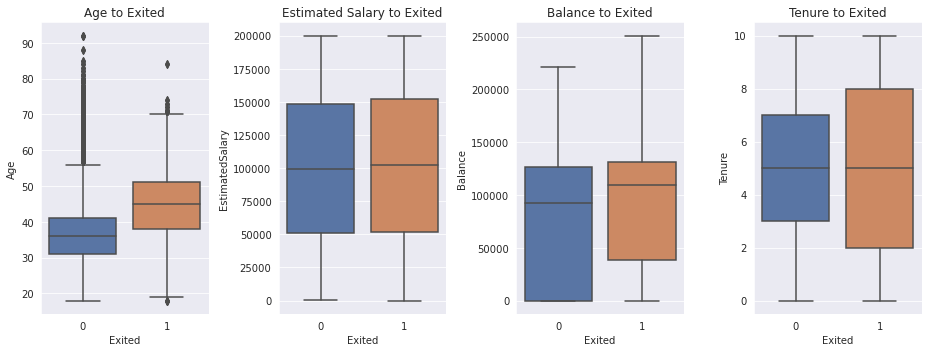

In [173]:
fig, axes = plt.subplots(1,4)
sns.set({'figure.figsize':(13,5)});
sns.boxplot(data = churndf, x = 'Exited', y = 'Age', ax = axes[0]).set(title = 'Age to Exited')
sns.boxplot(data = churndf, x = 'Exited', y = 'EstimatedSalary', ax = axes [1]).set(title = 'Estimated Salary to Exited')
sns.boxplot(data = churndf, x = 'Exited', y = 'Balance', ax = axes [2]).set(title = 'Balance to Exited')
sns.boxplot(data = churndf, x = 'Exited', y = 'Tenure', ax = axes [3]).set(title = 'Tenure to Exited');
fig.tight_layout()

**Creating count\-plots for values that wouldn't be properly visualized by box plots due to being categorical.**



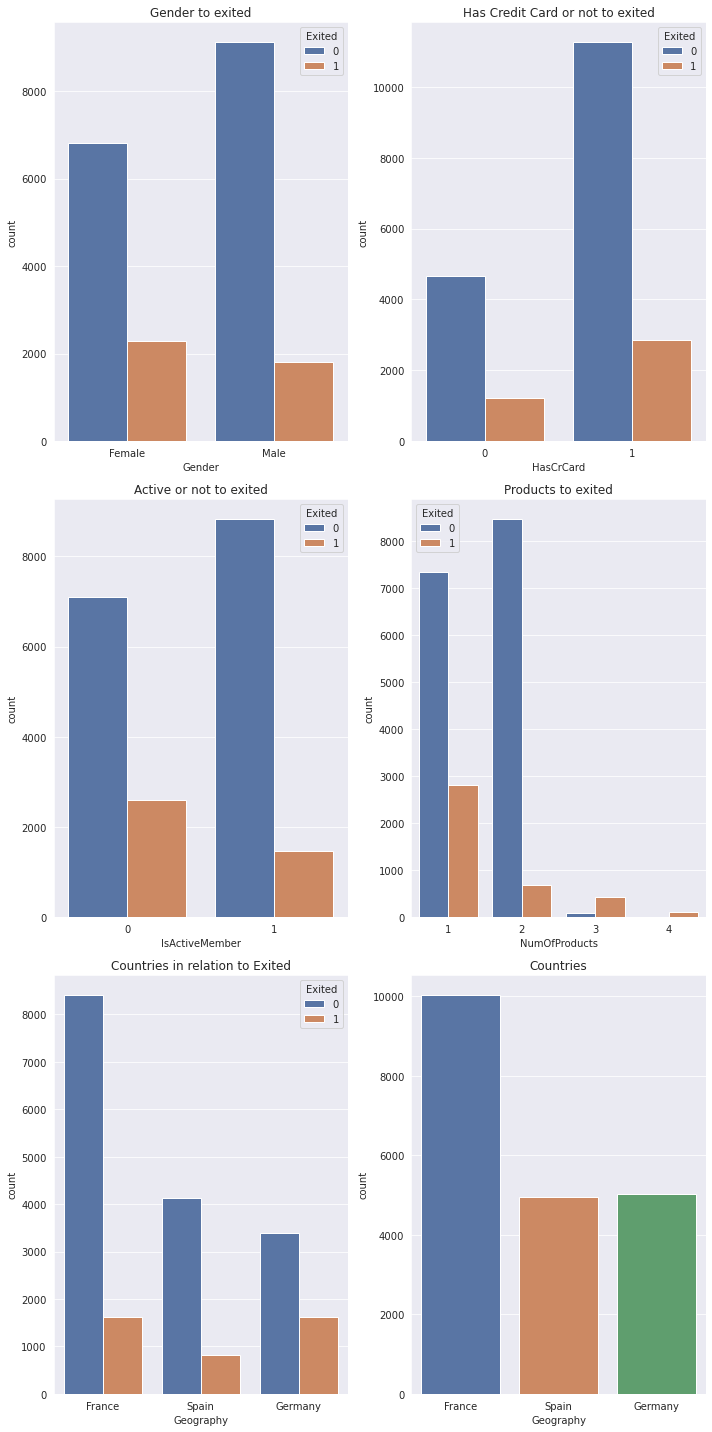

In [203]:
fig, axes = plt.subplots(3,2)
sns.set({'figure.figsize':(10,20)});
sns.countplot(data = churndf, x = 'Gender', hue = 'Exited', ax = axes [0,0]).set(title = 'Gender to exited')
sns.countplot(data = churndf, x = 'HasCrCard', hue = 'Exited', ax = axes [0,1]).set(title = 'Has Credit Card or not to exited')
sns.countplot(data = churndf, x = 'IsActiveMember', hue = 'Exited', ax = axes [1,0]).set(title = 'Active or not to exited')
sns.countplot(data = churndf, x = 'NumOfProducts', hue = 'Exited', ax = axes [1,1]).set(title = 'Products to exited')
sns.countplot(data=churndf, x = 'Geography', hue = 'Exited', ax = axes[2,0]).set(title = 'Countries in relation to Exited')
sns.countplot(data = churndf, x = 'Geography', ax = axes[2,1]).set(title='Countries')
fig.tight_layout();

**Creating a scatterplot that compares multiple values together to better visualize the correlation between the two.**


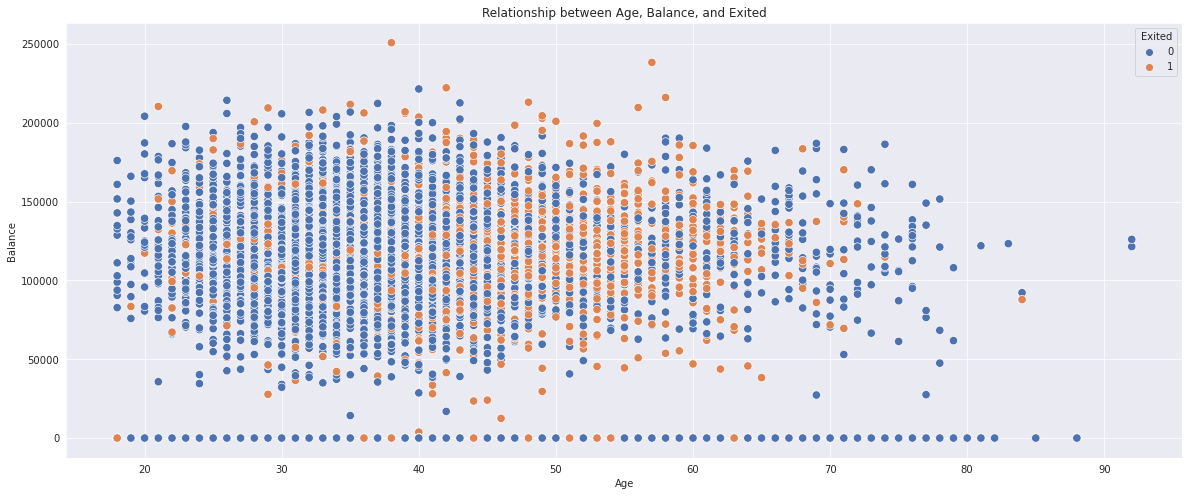

In [186]:
plt.figure(figsize=(20,8))
sns.scatterplot(x ='Age', y='Balance', hue = 'Exited', s= 70, data = churndf).set(title='Relationship between Age, Balance, and Exited');
fig.tight_layout()

**Summary**

The dataset we chose includes multiple variables that describe customers at a bank. Our target is finding whether or not a customer will leave the bank, and our variable for that is Exited, with a value of 1 meaning that the customer has left, and a value of 0 meaning that the customer remains. 

Through our analyzation of the correlation between variables, we found that all of the ones that we didn't remove played a small role in predicting whether or not the customer has exited or will exit \(as seen in our heat\-map\). 

Some of the variables we chose to analyze through exploratory data analysis were the age of the customer, their estimated salary, balance, tenure, 
gender, which country they were from, whether they had a credit card or not, how active they were, and the number of products they were utilizing from the bank. 

